In [5]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

from __future__ import division

import pandas_datareader.data as web

In [15]:
#tech stocks for analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
# End and Start times for data grab

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [8]:
#loop for grabing yahoo finance data and setting it as dataframe

for stock in tech_list:   
    
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [16]:
#summary statistics

AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,243.000000,233.000000,203.000000,251.000000
mean,140.948532,138.054722,139.461945,139.566072,9.163725e+07,139.163130,138.672955,138.192852,137.209630,0.001270
std,13.271286,12.928185,13.004383,13.142527,2.966867e+07,13.317818,12.350458,11.342158,9.684712,0.016008
min,120.400002,116.209999,119.029999,116.360001,4.100000e+07,115.819870,120.615508,120.835482,125.726871,-0.041674
25%,130.347500,127.052500,128.734997,128.882504,6.979622e+07,128.092831,128.571383,128.401444,127.943044,-0.007901
50%,138.334999,135.805000,136.610001,137.025002,8.744580e+07,136.411346,136.042224,135.347000,134.572479,0.001410
75%,149.440002,146.912502,148.445004,148.570000,1.078655e+08,148.203701,147.453304,147.235411,147.157729,0.012176
max,182.130005,175.529999,181.119995,179.449997,1.954327e+08,179.449997,174.278999,168.260001,156.790181,0.053851


<AxesSubplot:xlabel='Date'>

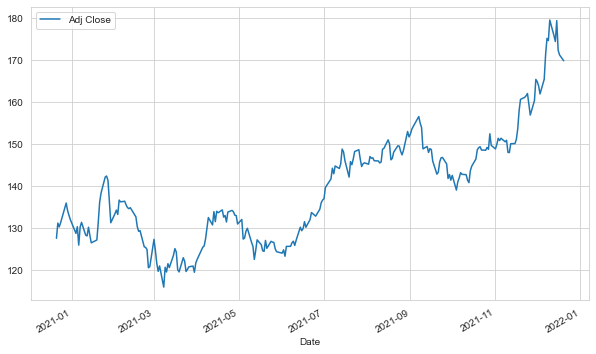

In [10]:
# historical view of the closing price

AAPL['Adj Close'].plot(legend=True,figsize=(10,6))

<AxesSubplot:xlabel='Date'>

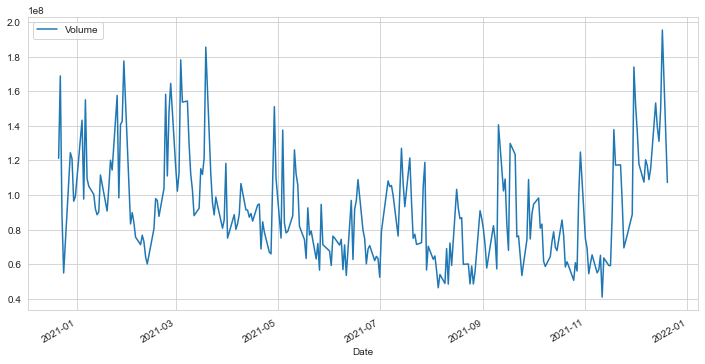

In [17]:
# a plot of the total volume of stock being traded each day over the past year


AAPL['Volume'].plot(legend=True,figsize=(12,6))

In [18]:
# plotting out several moving averages for the specifies number of days below

ma_day = [10,20,50]

for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name]=pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

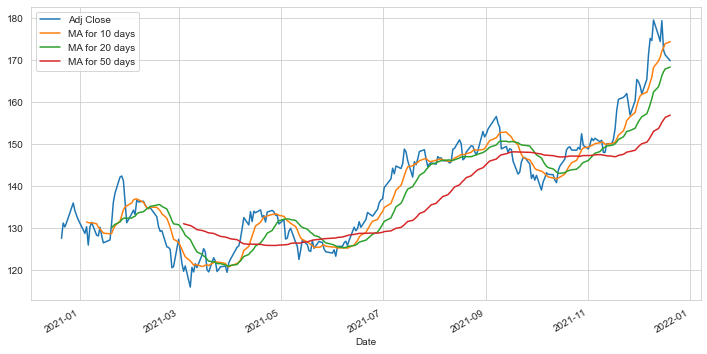

In [19]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))

<AxesSubplot:xlabel='Date'>

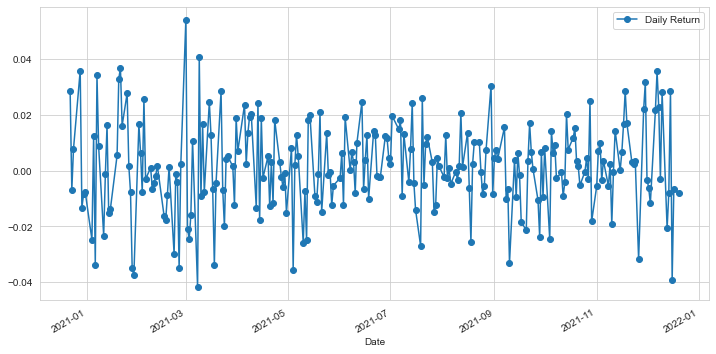

In [20]:
# using pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# Then plotting the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,6),legend=True,linestyle='-',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

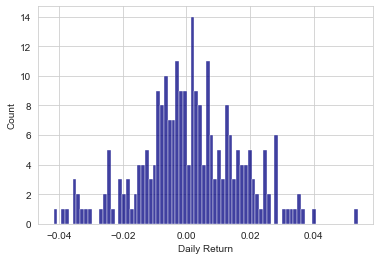

In [21]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=80,color='navy')

In [22]:
# Grabbing all the closing prices for the tech stock list into one DataFrame

closing_df = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [23]:
#preview

closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-12-21,127.444328,1739.369995,220.739685,3206.179932
2020-12-22,131.071976,1723.500000,222.078476,3206.520020
2020-12-23,130.157608,1732.380005,219.182739,3185.270020
2020-12-24,131.161423,1738.849976,220.898361,3172.689941
2020-12-28,135.852509,1776.089966,223.089981,3283.959961


In [24]:
# Making a new tech returns DataFrame

tech_rets = closing_df.pct_change()

In [91]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-12-17,NaN,NaN,NaN,NaN
2020-12-18,-0.015851,-0.009663,-0.003783,-0.010639
2020-12-21,0.012395,0.004830,0.018299,0.001415
2020-12-22,0.028464,-0.009124,0.006065,0.000106
2020-12-23,-0.006976,0.005152,-0.013039,-0.006627


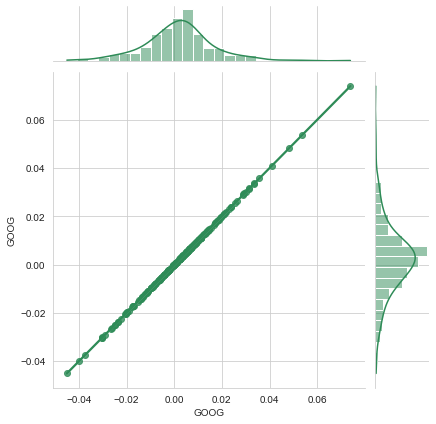

In [105]:
# Comparing Google stock to itself and it shows a perfectly linear relationship 
# in terms of correlation

sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='reg',color='seagreen')

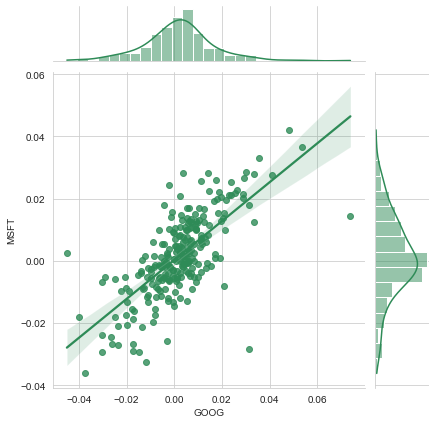

In [25]:
# using joinplot to compare the daily returns of Google and Microsoft

sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='reg',color='seagreen')

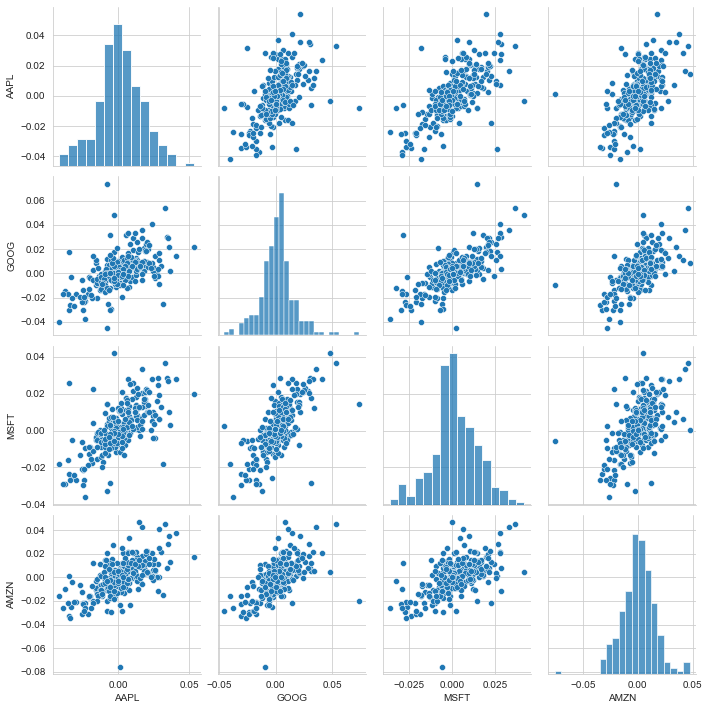

In [109]:
#comparison analysis with pairplot

sns.pairplot(tech_rets.dropna())

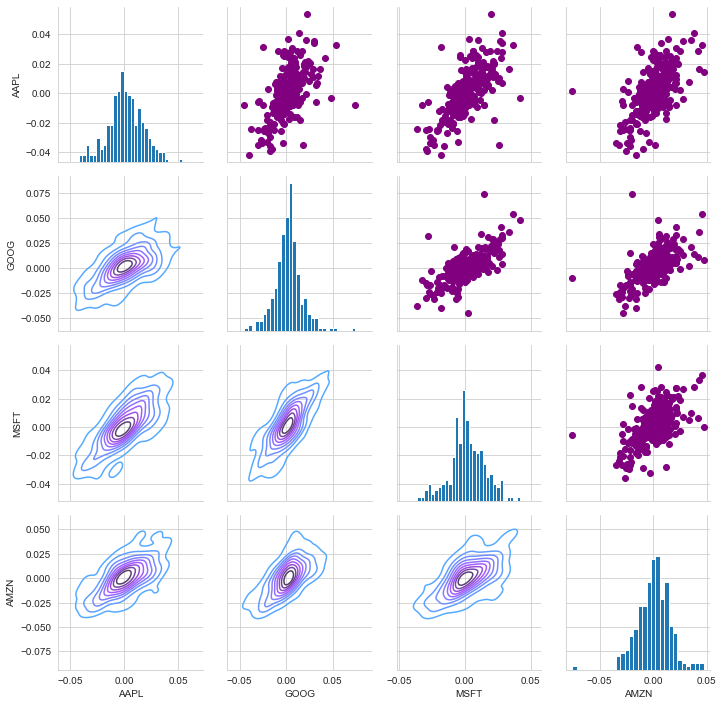

In [112]:
# Setting up a figure named returns_fig
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper to specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# defining the lower triangle in the figure
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# defining the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

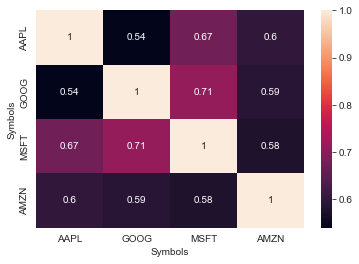

In [134]:
#using seaborn correlation plot for the daily returns of stocks

sns.heatmap(tech_rets.corr(),annot=True)

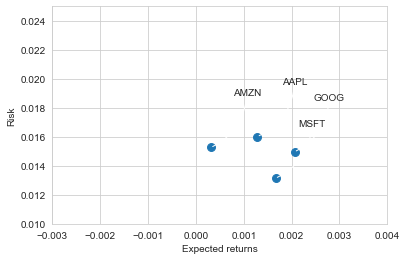

In [140]:
# defining a new DataFrame to analyze the risk of this stocks
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),s =area)

# x and y limits of the plot
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


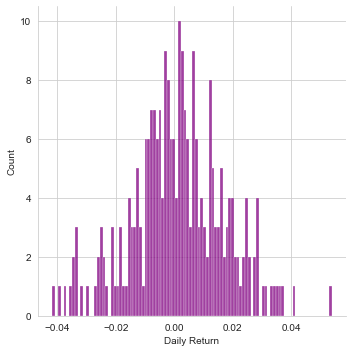

In [152]:
#analysing a year worth of daily returns

sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [160]:
#calculating the risk value of each stocks

# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.02563770156465826

In [155]:
rets['GOOG'].quantile(0.05)

-0.02297299732039048

In [156]:
rets['AMZN'].quantile(0.05)

-0.025231703593007537

In [157]:
rets['MSFT'].quantile(0.05)

-0.02107259386448007